##  Importing Libraries

In [5]:
!conda install -c conda-forge beautifulsoup4 --yes

!conda install -c conda-forge folium=0.5.0 --yes

print('Libraries installed!')

WARNING conda.base.context:use_only_tar_bz2(632): Conda is constrained to only using the old .tar.bz2 file format because you have conda-build installed, and it is <3.18.3.  Update or remove conda-build to get smaller downloads and faster extractions.
Solving environment: failed

PackagesNotFoundError: The following packages are not available from current channels:

  - anaconda/linux-64::grpcio==1.16.1=py36hf8bcb03_1 -> openssl[version='>=1.1.1,<1.1.2.0a0']

Current channels:

  - https://conda.anaconda.org/conda-forge/linux-64
  - https://conda.anaconda.org/conda-forge/noarch
  - https://repo.anaconda.com/pkgs/main/linux-64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/r/linux-64
  - https://repo.anaconda.com/pkgs/r/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.


WARNING conda.base.context:use_only_tar_bz2(632): Co

In [6]:
pip install geocoder

Note: you may need to restart the kernel to use updated packages.


In [7]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

import json # library to handle JSON files

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import geocoder # to get coordinates

import requests # library to handle requests
from bs4 import BeautifulSoup # library to parse HTML and XML documents

from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

import folium # map rendering library

print("Libraries imported.")

Libraries imported.


In [8]:
# use the inline backend to generate the plots within the browser
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.1.0


# Data Understanding and Preparation

###  Getting Data

In [9]:
df_Mumbai= pd.read_csv("zomato_res_final.csv")

In [10]:
df_Mumbai.head(3)

,Additional_outlet_count,Call,Cost_for_two(Rs.),Cuisines,Features,Home_Delivery,Operational_hours,Restaurant_Location,Restaurant_Name,Restaurant_Type,View_Menu,Min_Order(Rs.),Delivery_Time(mins),Rating,Votes,Rating_Category,Operational_after_Midnight,Cuisine_count,Feature_Count,Res_Type_Count,Competitors_in_Location,Score
0,1.0,True,1500,"Finger Food, Continental, European, Italian","Food Hygiene Rated Restaurants In Mumbai, Best...",False,12noon – 1am (Mon-Sun),Kamala Mills Compound,Lord of the Drinks,"Lounge,Casual Dining",True,NaN,NaN,4.9,1326.0,Excellent,True,4,2,2,19.0,48.000806
1,1.0,True,800,Pizza,"Value For Money, Best of Mumbai",False,11am – 12:30AM (Mon-Sun),Malad West,Joey's Pizza,Quick Bites,True,NaN,NaN,4.6,5974.0,Excellent,True,1,2,1,209.0,71.950295
2,NaN,True,2500,Seafood,"Super Seafood, Best of Mumbai",False,"Closed (Mon),12noon – 3pm, 7pm – 12midnight...",Bandra West,Bastian,"Casual Dining,Bar",True,NaN,NaN,4.5,1438.0,Excellent,False,1,2,2,241.0,43.160370


In [11]:
Mumbai_new= df_Mumbai[['Cuisines', 'Restaurant_Location', 'Restaurant_Name', 'Restaurant_Type',  'Cost_for_two(Rs.)',  'Rating', 'Votes', 'Rating_Category', 'Competitors_in_Location']]

In [12]:
Mumbai_new.head(3)

,Cuisines,Restaurant_Location,Restaurant_Name,Restaurant_Type,Cost_for_two(Rs.),Rating,Votes,Rating_Category,Competitors_in_Location
0,"Finger Food, Continental, European, Italian",Kamala Mills Compound,Lord of the Drinks,"Lounge,Casual Dining",1500,4.9,1326.0,Excellent,19.0
1,Pizza,Malad West,Joey's Pizza,Quick Bites,800,4.6,5974.0,Excellent,209.0
2,Seafood,Bandra West,Bastian,"Casual Dining,Bar",2500,4.5,1438.0,Excellent,241.0


### Sorting Data 

In [13]:
every_location = Mumbai_new.groupby('Restaurant_Location', axis=0).count()
every_location.shape

(120, 8)

In [14]:
every_location.reset_index(inplace=True)

In [15]:
every_location.head()

,Restaurant_Location,Cuisines,Restaurant_Name,Restaurant_Type,Cost_for_two(Rs.),Rating,Votes,Rating_Category,Competitors_in_Location
0,4 Bungalows,32,32,24,32,32,32,32,32
1,Airoli,68,68,61,68,68,68,68,68
2,Alibaug,7,7,7,7,7,7,7,7
3,Ambernath,12,12,12,12,12,12,12,12
4,Andheri,3,3,3,3,3,3,3,3


In [16]:
average_paramenters = Mumbai_new.groupby('Restaurant_Location', axis=0).mean()

In [17]:
average_paramenters.head()

,Cost_for_two(Rs.),Rating,Votes,Competitors_in_Location
Restaurant_Location,,,,
4 Bungalows,556.250000,3.718750,305.281250,32.0
Airoli,480.147059,3.529412,181.000000,68.0
Alibaug,900.000000,3.585714,131.857143,7.0
Ambernath,525.000000,3.366667,22.250000,12.0
Andheri,4000.000000,4.033333,236.666667,3.0


In [18]:
average_paramenters.reset_index(inplace=True)

In [19]:
average_paramenters.head()

,Restaurant_Location,Cost_for_two(Rs.),Rating,Votes,Competitors_in_Location
0,4 Bungalows,556.250000,3.718750,305.281250,32.0
1,Airoli,480.147059,3.529412,181.000000,68.0
2,Alibaug,900.000000,3.585714,131.857143,7.0
3,Ambernath,525.000000,3.366667,22.250000,12.0
4,Andheri,4000.000000,4.033333,236.666667,3.0


In [20]:
cost_df= average_paramenters.sort_values(by='Cost_for_two(Rs.)', ascending= False)

In [21]:
average_cost= cost_df[['Restaurant_Location', 'Cost_for_two(Rs.)' ]]

In [22]:
cost_df.head()

,Restaurant_Location,Cost_for_two(Rs.),Rating,Votes,Competitors_in_Location
4,Andheri,4000.000000,4.033333,236.666667,3.0
8,Bandra,3416.666667,3.983333,465.500000,6.0
10,Bandra Kurla Complex,2003.947368,4.152632,949.526316,38.0
27,Dadar,1850.000000,3.700000,116.000000,1.0
26,Cuffe Parade,1833.076923,3.823077,424.153846,13.0


In [23]:
rating_df= average_paramenters.sort_values(by='Rating', ascending= False)

In [24]:
rating_df.head()

,Restaurant_Location,Cost_for_two(Rs.),Rating,Votes,Competitors_in_Location
54,Kamala Mills Compound,1734.210526,4.289474,1077.894737,19.0
10,Bandra Kurla Complex,2003.947368,4.152632,949.526316,38.0
98,Runwal Green,670.000000,4.140000,928.400000,5.0
4,Andheri,4000.000000,4.033333,236.666667,3.0
8,Bandra,3416.666667,3.983333,465.500000,6.0


In [25]:
Votes_df= average_paramenters.sort_values(by='Votes', ascending= False)

In [26]:
Votes_df.head()

,Restaurant_Location,Cost_for_two(Rs.),Rating,Votes,Competitors_in_Location
24,Churchgate,1247.916667,3.900000,1136.541667,24.0
54,Kamala Mills Compound,1734.210526,4.289474,1077.894737,19.0
10,Bandra Kurla Complex,2003.947368,4.152632,949.526316,38.0
98,Runwal Green,670.000000,4.140000,928.400000,5.0
25,Colaba,1264.024390,3.832927,790.231707,82.0


In [27]:
competitors_df= average_paramenters.sort_values(by='Competitors_in_Location', ascending= False)

In [28]:
competitors_df.head()

,Restaurant_Location,Cost_for_two(Rs.),Rating,Votes,Competitors_in_Location
108,Thane West,544.870466,3.653627,200.113990,386.0
6,Andheri West,628.644068,3.785424,391.220339,295.0
11,Bandra West,828.755187,3.892116,559.639004,241.0
70,Malad West,562.153110,3.641627,252.421053,209.0
77,Mira Road,505.245098,3.564706,151.656863,204.0


### Rating Category Counts

In [29]:
df_rating_category = Mumbai_new.groupby('Rating_Category', axis=0).count()
df_rating_category.head(10)

,Cuisines,Restaurant_Location,Restaurant_Name,Restaurant_Type,Cost_for_two(Rs.),Rating,Votes,Competitors_in_Location
Rating_Category,,,,,,,,
Average,1886,1883,1886,1713,1886,1886,1886,1883
Excellent,143,141,143,131,143,143,143,141
Good,3309,3301,3310,3054,3310,3310,3310,3301
Poor,17,17,17,16,17,17,17,17
Very Good,1170,1169,1170,1047,1170,1170,1170,1169


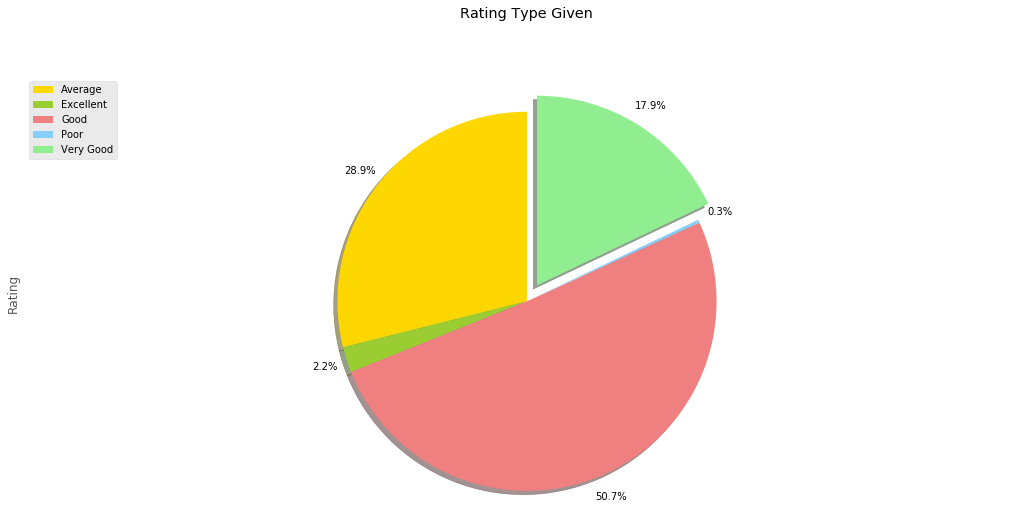

In [30]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0, 0, 0, 0, 0.1] # ratio for each continent with which to offset each wedge.

df_rating_category['Rating'].plot(kind='pie',
                            figsize=(18,8),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list 
                            )

# scale the title up by 12% to match pctdistance
plt.title('Rating Type Given', y=1.12) 

plt.axis('equal') 

# add legend
plt.legend(labels=df_rating_category.index, loc='upper left') 

plt.show()

### Plotting the Average Values According to the Location

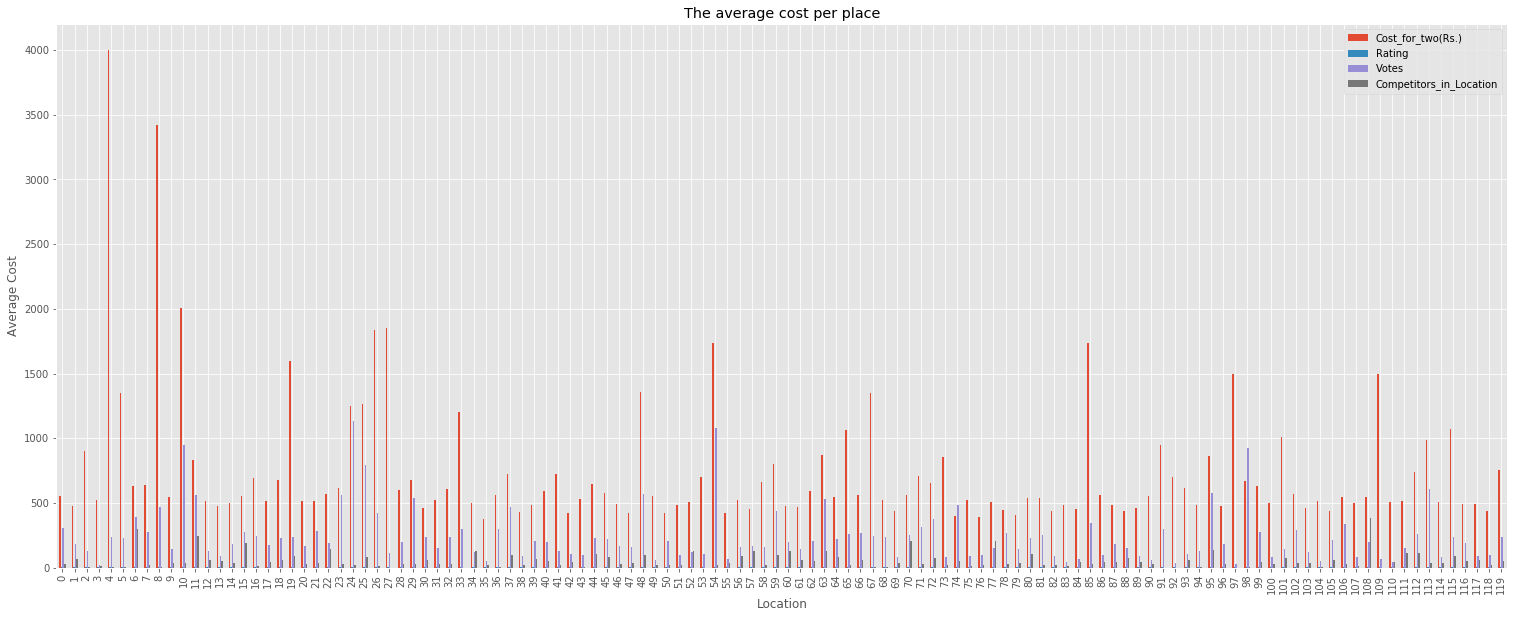

In [31]:
average_paramenters.plot(kind='bar', figsize=(26, 10))

plt.xlabel('Location') # add to x-label to the plot
plt.ylabel('Average Cost') # add y-label to the plot
plt.title('The average cost per place') # add title to the plot

plt.show()

### Getting the Location of Mumbai, India

In [32]:
# get the coordinates of Mumbai
address = 'Mumbai, India'

geolocator = Nominatim(user_agent="my-application")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Mumbai, India {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Mumbai, India 18.9387711, 72.8353355.


### Getting Coordinates of All Neighbourhoods

In [33]:
df_location= every_location[['Restaurant_Location']]

In [34]:
df_location.head()

,Restaurant_Location
0,4 Bungalows
1,Airoli
2,Alibaug
3,Ambernath
4,Andheri


In [35]:
# define a function to get coordinates
def get_lat_long(df_location):
    # initialize your variable to None
    lat_long_coords = None
    # loop until you get the coordinates
    while(lat_long_coords is None):
        g = geocoder.arcgis('{}, Mumbai, India'.format(df_location))
        lat_long_coords = g.latlng
    return lat_long_coords

In [36]:
coordinates = [ get_lat_long(df_location) for df_location in df_location["Restaurant_Location"].tolist() ]

In [37]:
coordinates

[[19.125170000000026, 72.82518000000005],
 [18.940170000000023, 72.83486000000005],
 [18.647550000000024, 72.87409000000008],
 [19.040960881210694, 72.8615734365803],
 [19.11848309908247, 72.84177419095158],
 [19.103950000000054, 72.86689000000007],
 [19.12924000000004, 72.83139000000006],
 [18.997200000000078, 72.85171000000008],
 [19.054220000000043, 72.84019000000006],
 [19.063930000000028, 72.84944000000007],
 [19.062070000000062, 72.86849000000007],
 [19.044650000000047, 72.81910000000005],
 [19.145560000000046, 72.94856000000004],
 [19.30746000000005, 72.85170000000005],
 [19.227940000000046, 72.86466000000007],
 [19.234960000000058, 72.85508000000004],
 [18.969030000000032, 72.80384000000004],
 [18.980740000000026, 72.84075000000007],
 [19.022886000000003, 73.04900175],
 [19.10836000000006, 72.86234000000007],
 [19.110160000000064, 72.89174000000008],
 [18.957190000000026, 72.82477000000006],
 [19.062200000000075, 72.90242000000006],
 [18.959436000000007, 72.81192374999999],
 [1

In [38]:
df_coordinates = pd.DataFrame(coordinates, columns=['Latitude', 'Longitude'])

In [39]:
df_location['Latitude'] = df_coordinates[['Latitude']]
df_location['Longitude'] = df_coordinates[['Longitude']]

/home/jupyterlab/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/jupyterlab/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [41]:
df_location.head()

,Restaurant_Location,Latitude,Longitude
0,4 Bungalows,19.125170,72.825180
1,Airoli,18.940170,72.834860
2,Alibaug,18.647550,72.874090
3,Ambernath,19.040961,72.861573
4,Andheri,19.118483,72.841774


### Mapping the Neighbourhoods on the Map

In [42]:
#map of neighbourhoods in Mumbai
map_mumbai = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, Restaurant_Location in zip(df_location['Latitude'], df_location['Longitude'], df_location['Restaurant_Location']):
    label = '{}'.format(Restaurant_Location)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_mumbai)  
    
map_mumbai

# Data Modelling

In [43]:
# @hidden_cell
# define Foursquare Credentials and Version
CLIENT_ID = 'NTRQLJ0IQRSLODU0TZIC3MTIJ2WR103MFD50HPFFYYSOGM4V' # your Foursquare ID
CLIENT_SECRET = '0CTZ0DFB1YSE5QSM0W40DXIR230MXH1PTWVHXGW4CJS1KU21' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version


In [44]:
radius = 2000
LIMIT = 100

venues = []

for lat, long, neighborhood in zip(df_location['Latitude'], df_location['Longitude'], df_location['Restaurant_Location']):
    
    # create the API request URL
    url = "https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}".format(
        CLIENT_ID,
        CLIENT_SECRET,
        VERSION,
        lat,
        long,
        radius, 
        LIMIT)
    
    # make the GET request
    results = requests.get(url).json()["response"]['groups'][0]['items']
    
    # return only relevant information for each nearby venue
    for venue in results:
        venues.append((
            neighborhood,
            lat, 
            long, 
            venue['venue']['name'], 
            venue['venue']['location']['lat'], 
            venue['venue']['location']['lng'],  
            venue['venue']['categories'][0]['name']))

In [45]:
# convert the venues list into a new DataFrame
venues_df = pd.DataFrame(venues)

# define the column names

venues_df.columns = ['Neighborhood', 'Latitude', 'Longitude', 'VenueName', 'VenueLatitude', 'VenueLongitude', 'VenueCategory']

print(venues_df.shape)
venues_df.head()

(9266, 7)


,Neighborhood,Latitude,Longitude,VenueName,VenueLatitude,VenueLongitude,VenueCategory
0,4 Bungalows,19.12517,72.82518,Joey's Pizza,19.126762,72.830001,Pizza Place
1,4 Bungalows,19.12517,72.82518,Pishu's Juice Center,19.128122,72.825384,Juice Bar
2,4 Bungalows,19.12517,72.82518,Di Bella,19.125454,72.822346,Café
3,4 Bungalows,19.12517,72.82518,Banana Leaf,19.125155,72.822580,Vegetarian / Vegan Restaurant
4,4 Bungalows,19.12517,72.82518,Urban Tadka,19.127011,72.821833,Indian Restaurant


In [46]:
venues_df.groupby(["Neighborhood"]).count()

,Latitude,Longitude,VenueName,VenueLatitude,VenueLongitude,VenueCategory
Neighborhood,,,,,,
4 Bungalows,100,100,100,100,100,100
Airoli,100,100,100,100,100,100
Alibaug,11,11,11,11,11,11
Ambernath,82,82,82,82,82,82
Andheri,100,100,100,100,100,100
Andheri East,100,100,100,100,100,100
Andheri West,100,100,100,100,100,100
Azad Nagar,13,13,13,13,13,13
Bandra,100,100,100,100,100,100


In [47]:
venues_df['VenueCategory'].unique()[:50]

array(['Pizza Place', 'Juice Bar', 'Café',
       'Vegetarian / Vegan Restaurant', 'Indian Restaurant', 'Pub',
       'South Indian Restaurant',
       'Residential Building (Apartment / Condo)',
       'Mediterranean Restaurant', 'Donut Shop', 'Multiplex', 'Beach',
       "Women's Store", 'Comfort Food Restaurant', 'Brewery',
       'American Restaurant', 'Diner', 'Ice Cream Shop', 'Bar',
       'Recreation Center', 'Gym / Fitness Center', 'Coffee Shop', 'Spa',
       'Liquor Store', 'Cocktail Bar', 'Lounge', 'Italian Restaurant',
       'Jewelry Store', 'Chinese Restaurant', 'BBQ Joint',
       'Movie Theater', 'Falafel Restaurant', 'Asian Restaurant',
       'Bakery', 'Hotel', 'Seafood Restaurant', 'Fast Food Restaurant',
       'Dessert Shop', 'Gym', 'Sports Bar', 'Parsi Restaurant',
       'Cricket Ground', 'Train Station', 'Scenic Lookout', 'Market',
       'Clothing Store', 'Cheese Shop', 'Bookstore',
       'Japanese Restaurant', 'Art Gallery'], dtype=object)

In [48]:
"Neighborhood" in venues_df['VenueCategory'].unique()

True

In [49]:
# one hot encoding
mumbai_onehot = pd.get_dummies(venues_df[['VenueCategory']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
mumbai_onehot['Neighborhoods'] = venues_df['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [mumbai_onehot.columns[-1]] + list(mumbai_onehot.columns[:-1])
mumbai_onehot = mumbai_onehot[fixed_columns]

print(mumbai_onehot.shape)
mumbai_onehot.head()

(9266, 246)


,Neighborhoods,Accessories Store,Afghan Restaurant,Airport,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Arcade,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,Auto Workshop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Beach,Bed & Breakfast,Beer Bar,Beer Garden,Bengali Restaurant,Big Box Store,Bistro,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bridge,Buffet,Building,Burger Joint,Burrito Place,Bus Station,Business Service,Cafeteria,Café,Camera Store,Campground,Castle,Chaat Place,Cheese Shop,Chinese Restaurant,City,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Academic Building,College Auditorium,College Gym,Comedy Club,Comfort Food Restaurant,Concert Hall,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cricket Ground,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dhaba,Dim Sum Restaurant,Diner,Donut Shop,Dumpling Restaurant,Duty-free Shop,Eastern European Restaurant,Electronics Store,Event Space,Factory,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gastropub,General College & University,General Entertainment,German Restaurant,Gift Shop,Gluten-free Restaurant,Goan Restaurant,Golf Course,Gourmet Shop,Government Building,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Hawaiian Restaurant,High School,Historic Site,History Museum,Hockey Arena,Hookah Bar,Hot Dog Joint,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indoor Play Area,Intersection,Irani Cafe,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Kids Store,Korean Restaurant,Light Rail Station,Lighthouse,Lingerie Store,Liquor Store,Lounge,Luggage Store,Maharashtrian Restaurant,Market,Martial Arts Dojo,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Mountain,Movie Theater,Moving Target,Mughlai Restaurant,Multicuisine Indian Restaurant,Multiplex,Music Store,Music Venue,Neighborhood,New American Restaurant,Nightclub,Noodle House,North Indian Restaurant,Office,Opera House,Other Great Outdoors,Outdoors & Recreation,Park,Parsi Restaurant,Performing Arts Venue,Pet Store,Pharmacy,Pier,Pizza Place,Planetarium,Platform,Playground,Plaza,Pool,Pool Hall,Pub,Punjabi Restaurant,Racetrack,Recording Studio,Recreation Center,Residential Building (Apartment / Condo),Resort,Restaurant,Road,Roof Deck,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shop & Service,Shopping Mall,Skating Rink,Smoke Shop,Snack Place,Soccer Field,Soccer Stadium,South American Restaurant,South Indian Restaurant,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,Sports Club,Stadium,Steakhouse,Supermarket,Sushi Restaurant,Tea Room,Tennis Court,Tex-Mex Restaurant,Thai Restaurant,Theater,Theme Park,Toll Booth,Toy / Game Store,Track,Track Stadium,Trail,Train,Train Station,Travel & Transport,Vegetarian / Vegan Restaurant,Water Park,Whisky Bar,Wine Bar,Wine Shop,Women's Store,Yoga Studio,Zoo
0,4 Bungalows,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,4 Bungalows,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [50]:
mumbai_grouped = mumbai_onehot.groupby(["Neighborhoods"]).mean().reset_index()

print(mumbai_grouped.shape)
mumbai_grouped.head(10)

(120, 246)


,Neighborhoods,Accessories Store,Afghan Restaurant,Airport,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Arcade,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,Auto Workshop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Beach,Bed & Breakfast,Beer Bar,Beer Garden,Bengali Restaurant,Big Box Store,Bistro,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bridge,Buffet,Building,Burger Joint,Burrito Place,Bus Station,Business Service,Cafeteria,Café,Camera Store,Campground,Castle,Chaat Place,Cheese Shop,Chinese Restaurant,City,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Academic Building,College Auditorium,College Gym,Comedy Club,Comfort Food Restaurant,Concert Hall,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cricket Ground,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dhaba,Dim Sum Restaurant,Diner,Donut Shop,Dumpling Restaurant,Duty-free Shop,Eastern European Restaurant,Electronics Store,Event Space,Factory,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gastropub,General College & University,General Entertainment,German Restaurant,Gift Shop,Gluten-free Restaurant,Goan Restaurant,Golf Course,Gourmet Shop,Government Building,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Hawaiian Restaurant,High School,Historic Site,History Museum,Hockey Arena,Hookah Bar,Hot Dog Joint,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indoor Play Area,Intersection,Irani Cafe,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Kids Store,Korean Restaurant,Light Rail Station,Lighthouse,Lingerie Store,Liquor Store,Lounge,Luggage Store,Maharashtrian Restaurant,Market,Martial Arts Dojo,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Mountain,Movie Theater,Moving Target,Mughlai Restaurant,Multicuisine Indian Restaurant,Multiplex,Music Store,Music Venue,Neighborhood,New American Restaurant,Nightclub,Noodle House,North Indian Restaurant,Office,Opera House,Other Great Outdoors,Outdoors & Recreation,Park,Parsi Restaurant,Performing Arts Venue,Pet Store,Pharmacy,Pier,Pizza Place,Planetarium,Platform,Playground,Plaza,Pool,Pool Hall,Pub,Punjabi Restaurant,Racetrack,Recording Studio,Recreation Center,Residential Building (Apartment / Condo),Resort,Restaurant,Road,Roof Deck,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shop & Service,Shopping Mall,Skating Rink,Smoke Shop,Snack Place,Soccer Field,Soccer Stadium,South American Restaurant,South Indian Restaurant,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,Sports Club,Stadium,Steakhouse,Supermarket,Sushi Restaurant,Tea Room,Tennis Court,Tex-Mex Restaurant,Thai Restaurant,Theater,Theme Park,Toll Booth,Toy / Game Store,Track,Track Stadium,Trail,Train,Train Station,Travel & Transport,Vegetarian / Vegan Restaurant,Water Park,Whisky Bar,Wine Bar,Wine Shop,Women's Store,Yoga Studio,Zoo
0,4 Bungalows,0.0,0.0,0.00,0.00,0.00,0.0,0.02,0.0,0.00,0.00,0.0,0.04,0.00,0.0,0.0,0.01,0.00,0.010000,0.0,0.05000,0.020000,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.000000,0.00,0.0,0.000000,0.000000,0.02,0.0,0.0,0.0,0.00,0.000000,0.0,0.000000,0.0,0.0,0.090000,0.0,0.0,0.000000,0.0,0.00,0.050000,0.000000,0.00,0.0,0.01,0.020000,0.00,0.00,0.0,0.0,0.01,0.0,0.00,0.00,0.0,0.0,0.00,0.000000,0.0,0.00,0.00000,0.0,0.01000,0.0,0.00,0.04,0.02,0.0,0.00,0.0,0.000000,0.00,0.0,0.01,0.0,0.00,0.02000,0.00,0.00,0.00,0.0,0.000000,0.000000,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0

### Let us assume our customer wants to open either an Italian Restaurant or an Indian Restaurant

In [51]:
print(len(mumbai_grouped[mumbai_grouped["Seafood Restaurant"] > 0]))
print(len(mumbai_grouped[mumbai_grouped["Indian Restaurant"] > 0]))

68
111


In [52]:
mumbai_restaurants = mumbai_grouped[["Neighborhoods","Seafood Restaurant", "Indian Restaurant"]]

In [50]:
mumbai_restaurants.head()

,Neighborhoods,Seafood Restaurant,Indian Restaurant
0,4 Bungalows,0.01000,0.090000
1,Airoli,0.03000,0.100000
2,Alibaug,0.00000,0.272727
3,Ambernath,0.02439,0.243902
4,Andheri,0.04000,0.170000


In [51]:
# set number of clusters
kclusters = 4

Mumbai_clustering = mumbai_restaurants.drop(["Neighborhoods"], 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Mumbai_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([3, 3, 0, 0, 2, 3, 2, 0, 3, 3], dtype=int32)

In [52]:
# create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.
mumbai_merged = mumbai_restaurants.copy()

# add clustering labels
mumbai_merged["Cluster Labels"] = kmeans.labels_

In [53]:
mumbai_merged.head()

,Neighborhoods,Seafood Restaurant,Indian Restaurant,Cluster Labels
0,4 Bungalows,0.01000,0.090000,3
1,Airoli,0.03000,0.100000,3
2,Alibaug,0.00000,0.272727,0
3,Ambernath,0.02439,0.243902,0
4,Andheri,0.04000,0.170000,2


In [54]:
mumbai_merged.rename(columns={"Neighborhoods": "Restaurant_Location"}, inplace=True)

In [55]:
# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
mumbai_merged = mumbai_merged.join(df_location.set_index("Restaurant_Location"), on="Restaurant_Location")

print(mumbai_merged.shape)
mumbai_merged.head() # check the last columns!

(120, 6)


,Restaurant_Location,Seafood Restaurant,Indian Restaurant,Cluster Labels,Latitude,Longitude
0,4 Bungalows,0.01000,0.090000,3,19.125170,72.825180
1,Airoli,0.03000,0.100000,3,18.940170,72.834860
2,Alibaug,0.00000,0.272727,0,18.647550,72.874090
3,Ambernath,0.02439,0.243902,0,19.040961,72.861573
4,Andheri,0.04000,0.170000,2,19.118483,72.841774


In [56]:
# sort the results by Cluster Labels
print(mumbai_merged.shape)
mumbai_merged.sort_values(["Cluster Labels"], inplace=True)
mumbai_merged.head(15)

(120, 6)


,Restaurant_Location,Seafood Restaurant,Indian Restaurant,Cluster Labels,Latitude,Longitude
98,Runwal Green,0.000000,0.194030,0,19.161110,72.945320
87,Near Andheri West Station,0.040000,0.200000,0,19.119200,72.846220
46,Grant Road,0.000000,0.210000,0,18.959290,72.831080
100,Sanpada,0.010204,0.224490,0,19.029483,72.842893
50,Kalbadevi,0.020000,0.220000,0,18.950040,72.829950
52,Kalyan,0.000000,0.210000,0,18.953937,72.820367
53,Kalyan West,0.000000,0.210000,0,18.953937,72.820367
118,Wadala,0.000000,0.202128,0,19.017160,72.858130
66,Mahim,0.010000,0.210000,0,19.040760,72.843070
21,Charni Road,0.000000,0.230000,0,18.957190,72.824770


In [58]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(mumbai_merged['Latitude'], mumbai_merged['Longitude'], mumbai_merged['Restaurant_Location'], mumbai_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' - Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [60]:
mumbai_merged.loc[mumbai_merged['Cluster Labels'] == 0]

,Restaurant_Location,Seafood Restaurant,Indian Restaurant,Cluster Labels,Latitude,Longitude
98,Runwal Green,0.000000,0.194030,0,19.161110,72.945320
87,Near Andheri West Station,0.040000,0.200000,0,19.119200,72.846220
46,Grant Road,0.000000,0.210000,0,18.959290,72.831080
100,Sanpada,0.010204,0.224490,0,19.029483,72.842893
50,Kalbadevi,0.020000,0.220000,0,18.950040,72.829950
52,Kalyan,0.000000,0.210000,0,18.953937,72.820367
53,Kalyan West,0.000000,0.210000,0,18.953937,72.820367
118,Wadala,0.000000,0.202128,0,19.017160,72.858130
66,Mahim,0.010000,0.210000,0,19.040760,72.843070
21,Charni Road,0.000000,0.230000,0,18.957190,72.824770


In [61]:
mumbai_merged.loc[mumbai_merged['Cluster Labels'] == 1]

,Restaurant_Location,Seafood Restaurant,Indian Restaurant,Cluster Labels,Latitude,Longitude
103,Seawoods,0.000000,0.000000,1,19.235052,72.830951
43,Gorai,0.000000,0.000000,1,19.240960,72.784190
35,Dombivali West,0.000000,0.000000,1,19.224970,73.082980
89,New Panvel,0.000000,0.038462,1,18.994440,73.115870
69,Malad East,0.035088,0.017544,1,19.182280,72.863960
70,Malad West,0.000000,0.064516,1,19.178990,72.816570
92,Panvel,0.000000,0.000000,1,18.839159,73.093396
73,Marve,0.000000,0.000000,1,19.196680,72.800020
34,Dombivali East,0.000000,0.000000,1,19.198450,73.094200
33,Dombivali,0.000000,0.000000,1,19.212870,73.083240


In [62]:
mumbai_merged.loc[mumbai_merged['Cluster Labels'] == 2]

,Restaurant_Location,Seafood Restaurant,Indian Restaurant,Cluster Labels,Latitude,Longitude
56,Kandivali East,0.014493,0.144928,2,19.205750,72.869690
112,Vashi,0.000000,0.170000,2,19.084700,72.904840
80,Mulund West,0.000000,0.148148,2,19.174370,72.950680
79,Mulund East,0.000000,0.156250,2,19.166610,72.963900
61,Kopar Khairane,0.000000,0.161290,2,19.105240,73.004010
62,Kurla,0.000000,0.149425,2,19.064940,72.880730
95,Powai,0.011628,0.139535,2,19.123110,72.909440
105,Sion,0.032787,0.180328,2,19.046460,72.863130
55,Kamothe,0.032967,0.153846,2,19.191094,72.973268
94,Peddar Road,0.000000,0.150000,2,18.973300,72.809670


In [63]:
mumbai_merged.loc[mumbai_merged['Cluster Labels'] == 3]

,Restaurant_Location,Seafood Restaurant,Indian Restaurant,Cluster Labels,Latitude,Longitude
0,4 Bungalows,0.010000,0.090000,3,19.125170,72.825180
96,Prabhadevi,0.020000,0.120000,3,19.014200,72.827760
97,Reclamation,0.040000,0.090000,3,19.049020,72.832210
101,Santacruz East,0.010000,0.120000,3,19.080480,72.851700
109,Turbhe,0.030000,0.100000,3,18.940170,72.834860
111,Vasai,0.030000,0.060000,3,19.079340,72.839160
113,Veera Desai Area,0.000000,0.090000,3,19.141074,72.836972
114,Vikhroli,0.020000,0.130000,3,19.111090,72.927810
115,Vile Parle East,0.064516,0.129032,3,19.097440,72.849420
93,Parel,0.020000,0.110000,3,18.995660,72.839070


**From the clustered data, we can see that for both seafood and indian Restaurants, cluster 1 seems to be the best choice. This would be because it has the least number of seafood restaurants overall which could be a good opportunity to expand business there. There would be less or very little competition from existing restaurants.** <br>
**Cluster 2 on the other hand is dense in terms of both seafood and indian restaurants. This means that there would already be well established restaurants there and thus they would not be the best place to start your business chain. The competition in such places would be highly intense and would be difficult to emulate with the surrounding restaurant chain.** <br>
**Based on both the clustering and the average parameters bar graph we can choose the most appropriate location for our restaurant. The average parameter's bar graph displays the mean values for multiple criterias which can be used for a much needed comparison.**